## Algorithm Evaluation

## Read the data

In [34]:
from warnings import filterwarnings

filterwarnings("ignore")

In [1]:
import pandas as pd

path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/train_loan.csv"
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Perform the basic data quality checks

In [2]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

## Separate X and Y features

In [5]:
X = df.drop(columns=["loan_status", "id"])
Y = df[["loan_status"]]

In [6]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [7]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing and Data cleaning

In [8]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

In [11]:
pre = ColumnTransformer([("cat", cat_pipe, cat), ("con", num_pipe, con)]).set_output(
    transform="pandas"
)

In [12]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [13]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


## Splitting of data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, train_size=0.75, random_state=42
)

In [15]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
29242,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.209693,-0.682117,0.140632,-0.921970,-0.209808,-0.698298
47036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.264855,0.075506,-1.387112,0.102853,-1.409489,-0.698298
54616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.588556,0.816061,0.075506,-0.758041,-1.043894,-1.191366,-0.698298
13552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,0.420604,-0.934659,-0.758041,0.191825,-1.082304,-0.450108
38408,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,-0.467857,2.853459,-1.009669,-0.921970,-0.864180,0.046274


In [16]:
xtest.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
4657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108
56440,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108
42117,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274
10849,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489
39395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036


In [17]:
ytrain.head()

,loan_status
29242,0
47036,0
54616,0
13552,0
38408,0


In [18]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


## Algorithm Evaluation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [21]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

In [22]:
models[0]

LogisticRegression()

In [25]:
type(models[0])

sklearn.linear_model._logistic.LogisticRegression

In [26]:
type(models[0]).__name__

'LogisticRegression'

In [27]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [28]:
def evaluate_model_scores(model, xtrain, ytrain, xtest, ytest):
    # Fit the model
    model.fit(xtrain, ytrain)

    # Evalualte the model: predictions are needed. Calculate predictions
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # calculate f1-score
    f1_tr = f1_score(ytrain, ypred_train, average="macro")
    f1_te = f1_score(ytest, ypred_test, average="macro")

    # calculate cross validated scores
    cv_tr = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
    f1_cv_avg = cv_tr.mean()

    # Return the results
    results = {
        "Name": type(model).__name__,
        "Training scores": f1_tr,
        "Testing Scores": f1_te,
        "CV scores": f1_cv_avg,
    }

    return results

In [39]:
def evaluate_all_models(models, xtrain, ytrain, xtest, ytest):
    # create an empty list that contains scores for all the models
    res = []
    # run a loop through multiple base models and get the scores from the calling function
    for model in models:
        results = evaluate_model_scores(model, xtrain, ytrain, xtest, ytest)
        print(results)
        # add the scores of individual models to above list 'res'
        res.append(results)

    # create a dataframe that contains all the model scores
    res_df = pd.DataFrame(res)

    # Sorting the dataframe on basis of cross validated scores
    res_df = res_df.sort_values(by="CV scores", ascending=False)

    return res_df

In [30]:
xtrain

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
29242,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.209693,-0.682117,0.140632,-0.921970,-0.209808,-0.698298
47036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.264855,0.075506,-1.387112,0.102853,-1.409489,-0.698298
54616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.588556,0.816061,0.075506,-0.758041,-1.043894,-1.191366,-0.698298
13552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,0.420604,-0.934659,-0.758041,0.191825,-1.082304,-0.450108
38408,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,-0.467857,2.853459,-1.009669,-0.921970,-0.864180,0.046274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.892204,-0.106673,-0.934659,1.039305,-0.098157,0.989873,2.528179
38158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.156966,-0.934659,0.140632,-1.337171,-0.209808,-0.698298
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.737448,0.684242,-1.187200,-1.054603,-1.732601,-1.409489,0.046274
15795,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,1.211518,-0.682117,-1.117510,0.840989,-1.409489,0.790845


In [31]:
xtrain.values

array([[ 1.        ,  0.        ,  0.        , ..., -0.92196953,
        -0.20980807, -0.69829813],
       [ 0.        ,  0.        ,  0.        , ...,  0.10285315,
        -1.40948946, -0.69829813],
       [ 1.        ,  0.        ,  0.        , ..., -1.04389377,
        -1.19136557, -0.69829813],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.73260097,
        -1.40948946,  0.04627361],
       [ 1.        ,  0.        ,  0.        , ...,  0.8409891 ,
        -1.40948946,  0.79084535],
       [ 0.        ,  0.        ,  0.        , ..., -0.00918534,
        -0.64605585, -0.94648871]], shape=(43983, 26))

In [40]:
res_df_op = evaluate_all_models(
    models, xtrain.values, ytrain.values, xtest.values, ytest.values
)
res_df_op

{'Name': 'LogisticRegression', 'Training scores': 0.7944717787293576, 'Testing Scores': 0.7873628649051267, 'CV scores': np.float64(0.7932948303614686)}
{'Name': 'DecisionTreeClassifier', 'Training scores': 1.0, 'Testing Scores': 0.8273486361008241, 'CV scores': np.float64(0.8250513883453123)}
{'Name': 'RandomForestClassifier', 'Training scores': 0.9998610403220831, 'Testing Scores': 0.8905326529878781, 'CV scores': np.float64(0.8877081167861423)}
{'Name': 'GradientBoostingClassifier', 'Training scores': 0.8901080681673348, 'Testing Scores': 0.8855461126673771, 'CV scores': np.float64(0.8864885130277559)}
{'Name': 'XGBClassifier', 'Training scores': 0.9255728820771623, 'Testing Scores': 0.8902849541658724, 'CV scores': np.float64(0.891279675390102)}


,Name,Training scores,Testing Scores,CV scores
4,XGBClassifier,0.925573,0.890285,0.891280
2,RandomForestClassifier,0.999861,0.890533,0.887708
3,GradientBoostingClassifier,0.890108,0.885546,0.886489
1,DecisionTreeClassifier,1.000000,0.827349,0.825051
0,LogisticRegression,0.794472,0.787363,0.793295


## XGBClassifier is providing the best Cross validated scores for training data. Let's consider this model for final model predictions

## Model Building

In [42]:
xgc = XGBClassifier(n_estimators=50, max_depth=5)
xgc.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [43]:
xgc.score(xtrain, ytrain)

0.9561194097719573

In [44]:
xgc.score(xtest, ytest)

0.9523257400081844

## Hyperparameter tuning

In [45]:
params = {"n_estimators": [50, 100, 150, 200, 250], "max_depth": [5, 7, 9, 10]}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
base_model = XGBClassifier()
rscv = RandomizedSearchCV(base_model, params, scoring="f1_macro", cv=5)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'max_depth': [5, 7, 9, 10],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   scoring='f1_macro')

In [48]:
rscv.best_score_

np.float64(0.8915896836412592)

In [49]:
rscv.best_params_

{'n_estimators': 50, 'max_depth': 5}

In [50]:
best_xgc = rscv.best_estimator_
best_xgc.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
best_xgc.score(xtrain, ytrain)

0.9561194097719573

In [52]:
best_xgc.score(xtest, ytest)

0.9523257400081844

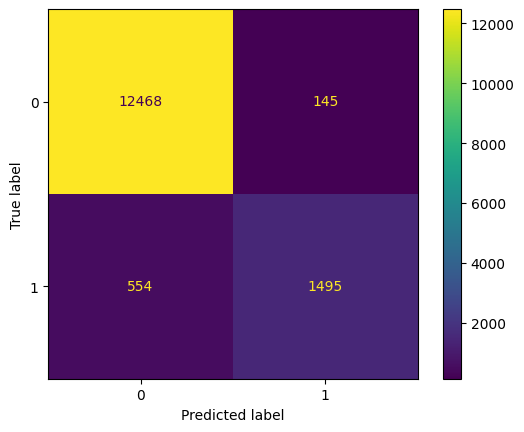

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ypred_test = best_xgc.predict(xtest)
ConfusionMatrixDisplay.from_estimator(best_xgc, xtest, ytest)

In [56]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.91      0.73      0.81      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



ROC curve-Receiver Operator Characterstics

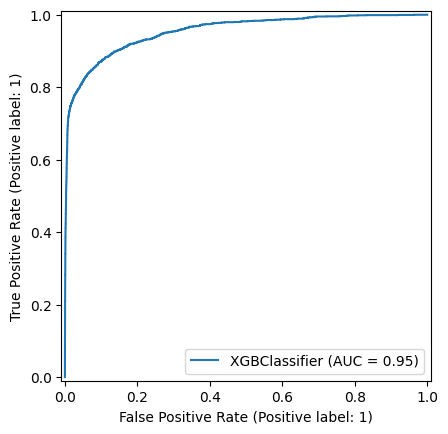

In [63]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_xgc, xtest, ytest)

## Out of sample predictions

In [57]:
path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/test_loan.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [58]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [59]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


In [60]:
final_preds = best_xgc.predict(xnew_pre)
final_preds

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))

In [61]:
xnew["Loan_status_predicted"] = final_preds
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_status_predicted
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [62]:
xnew.to_csv("Loan predictions.csv", index=False)